In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Настя\Downloads\archive\product_sales.csv")
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Age_Group_NUMBER,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,01-01-17,1,January,2017,17,Youth (<25),1,M,canada,Bikes,2,1519.0,2443.0,1848.0,3038.0,4886.0
1,01-01-17,1,January,2017,23,Youth (<25),1,M,Australia,Bikes,2,1252.0,2295.0,2086.0,2504.0,4590.0
2,01-01-17,1,January,2017,33,Young Adults (25-34),1,F,France,Bikes,2,2171.0,3578.0,2814.0,4342.0,7156.0
3,01-01-17,1,January,2017,39,Adults (35-64),1,M,United States,Bikes,2,713.0,1120.0,814.0,1426.0,2240.0
4,01-01-17,1,January,2017,42,Adults (35-64),1,M,United States,Bikes,2,344.0,540.0,392.0,688.0,1080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,31-12-21,31,December,2021,52,Adults (35-64),1,F,United Kingdom,Bikes,2,1555.0,2443.0,1776.0,3110.0,4886.0
113032,31-12-21,31,December,2021,25,Young Adults (25-34),1,F,Germany,Bikes,1,713.0,1120.0,407.0,713.0,1120.0
113033,31-12-21,31,December,2021,26,Young Adults (25-34),1,M,Australia,Bikes,1,713.0,1120.0,407.0,713.0,1120.0
113034,31-12-21,31,December,2021,33,Young Adults (25-34),1,F,Australia,Bikes,1,1252.0,2295.0,1043.0,1252.0,2295.0


In [3]:
#Correcting small mistake in country names by capitalizing the initial letter.
df['Country'] = df['Country'].replace({'canada': 'Canada'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              113036 non-null  object 
 1   Day               113036 non-null  int64  
 2   Month             113036 non-null  object 
 3   Year              113036 non-null  int64  
 4   Customer_Age      113036 non-null  int64  
 5   Age_Group         113036 non-null  object 
 6   Age_Group_NUMBER  113036 non-null  int64  
 7   Customer_Gender   113036 non-null  object 
 8   Country           113036 non-null  object 
 9   Product_Category  113036 non-null  object 
 10  Order_Quantity    113036 non-null  int64  
 11  Unit_Cost         113036 non-null  float64
 12  Unit_Price        113036 non-null  float64
 13  Profit            113036 non-null  float64
 14  Cost              113036 non-null  float64
 15  Revenue           113036 non-null  float64
dtypes: float64(5), int64

In [5]:
#Data Cleaning and Preprocessing
df.isnull()

,Date,Day,Month,Year,Customer_Age,Age_Group,Age_Group_NUMBER,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113032,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113033,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113034,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Age_Group_NUMBER    0
Customer_Gender     0
Country             0
Product_Category    0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [7]:
#Descriptive Statistics
descriptive_data = df[['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']].describe()
descriptive_data

,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,11.901660,267.296366,452.938427,372.681358,469.318695,842.000053
std,9.561857,549.835483,922.071219,595.080571,884.866118,1466.202934
min,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,2.000000,2.000000,5.000000,39.000000,28.000000,70.000000
50%,10.000000,9.000000,24.000000,135.000000,108.000000,245.000000
75%,20.000000,42.000000,70.000000,432.000000,432.000000,880.000000
max,32.000000,2171.000000,3578.000000,26158.000000,42978.000000,69136.000000


In [22]:
#Analysing dataset in accordance to different age groups using groupby method
age_group_stats = df.groupby('Age_Group').agg({
    'Order_Quantity': 'sum',
    'Profit': 'sum',
    'Revenue': 'sum'
})
print(age_group_stats)

                      Order_Quantity      Profit     Revenue
Age_Group                                                   
Adults (35-64)                672417  21061305.0  47323876.0
Seniors (64+)                   9877    169823.0    339700.0
Young Adults (25-34)          446875  15042052.0  34310905.0
Youth (<25)                   216147   5853230.0  13201837.0


In [9]:
#Calculating the average profit and revenue per age group
avg_profit_revenue = df.groupby('Age_Group').agg({
    'Profit': 'mean',
    'Revenue': 'mean'
})
avg_profit_revenue.sort_values(by='Profit', ascending = False)

,Profit,Revenue
Age_Group,,
Young Adults (25-34),389.146065,887.641771
Adults (35-64),377.280471,847.733520
Youth (<25),328.316693,740.511387
Seniors (64+),232.634247,465.342466


In [10]:
#Analyzing the total profit and revenue based on age group and gender
gender_age_group_stats = df.groupby(['Age_Group', 'Customer_Gender']).agg({
    'Profit': 'sum',
    'Revenue': 'sum'
})
gender_age_group_stats

Profit     Revenue
Age_Group            Customer_Gender                        
Adults (35-64)       F                10465616.0  23618098.0
                     M                10595689.0  23705778.0
Seniors (64+)        F                   75863.0    140858.0
                     M                   93960.0    198842.0
Young Adults (25-34) F                 7444589.0  17063334.0
                     M                 7597463.0  17247571.0
Youth (<25)          F                 2657643.0   6023152.0
                     M                 3195587.0   7178685.0

In [11]:
#Analysing and visualising total profit based on countries
country_stats = df.groupby('Country').agg({
    'Profit': 'sum',
    'Revenue': 'sum'
})
country_stats.sort_values(by='Profit',ascending = False)

,Profit,Revenue
Country,,
United States,13912871.0,30814774.0
Australia,10901557.0,25427586.0
United Kingdom,4857663.0,11090006.0
Germany,4363602.0,9982203.0
France,4294623.0,9847213.0
Canada,3796094.0,8014536.0


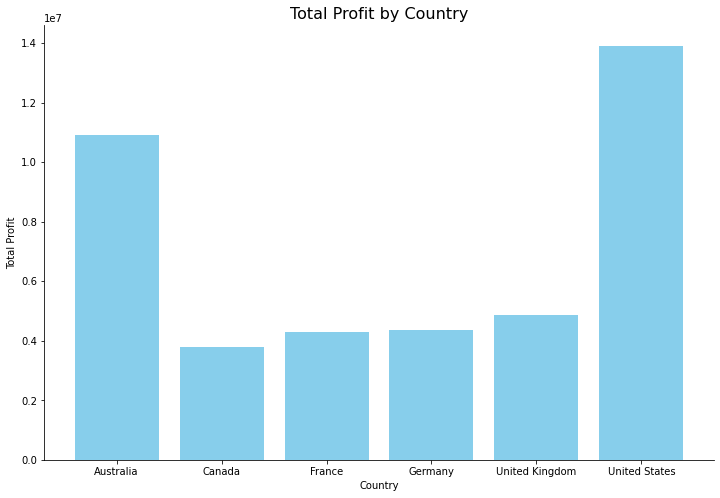

In [56]:
plt.figure(figsize=(12, 8))
plt.bar(x=country_stats.index, height=country_stats['Profit'], color='skyblue')
plt.title('Total Profit by Country', fontsize = 16)
plt.xlabel('Country')
plt.ylabel('Total Profit')
sns.despine()
plt.show()

In [44]:
#Correlation Analysis
#Explore the correlation between numerical columns to understand the relationships between variables
corr_values = df[['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']].corr()
corr_values

,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Order_Quantity,1.000000,-0.515835,-0.515925,-0.268903,-0.340382,-0.314561
Unit_Cost,-0.515835,1.000000,0.997894,0.788331,0.829869,0.820789
Unit_Price,-0.515925,0.997894,1.000000,0.795308,0.826301,0.821468
Profit,-0.268903,0.788331,0.795308,1.000000,0.961552,0.986170
Cost,-0.340382,0.829869,0.826301,0.961552,1.000000,0.993769
Revenue,-0.314561,0.820789,0.821468,0.986170,0.993769,1.000000


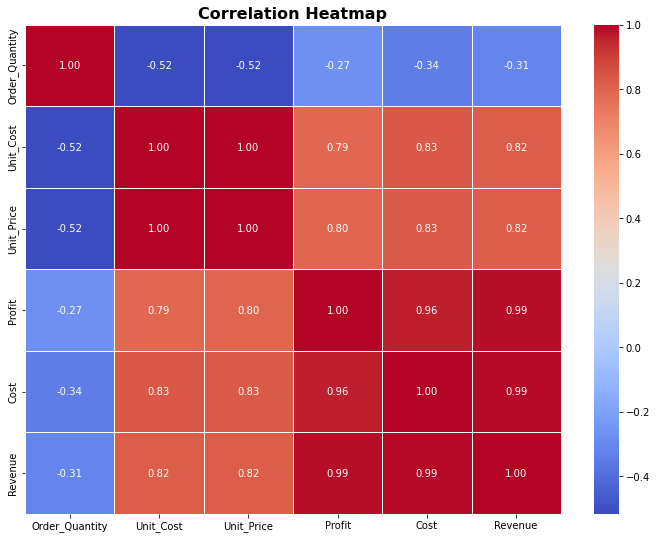

In [55]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_values, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.6)
plt.title('Correlation Heatmap', fontsize = 16)
plt.show()